In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

In [17]:
# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['species'] = iris['target']

In [18]:
# Use only the lengths (sepal length and petal length)
X = df[['sepal length (cm)', 'petal length (cm)']].values
y = df['species'].values

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Train a Support Vector Machine (SVC) classifier
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [22]:
# Predictions
y_pred = clf.predict(X_test)

In [23]:
# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


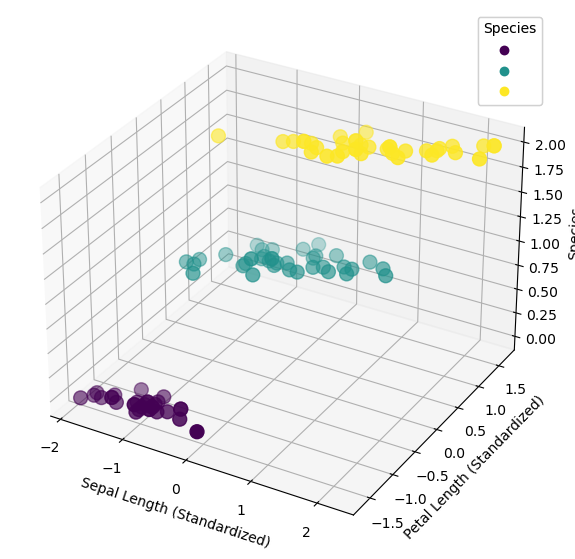

In [24]:
# Visualization in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the training points
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], y_train, 
                     c=y_train, marker='o', s=100, cmap='viridis')

# Setting the labels
ax.set_xlabel('Sepal Length (Standardized)')
ax.set_ylabel('Petal Length (Standardized)')
ax.set_zlabel('Species')
legend1 = ax.legend(handles=scatter.legend_elements()[0], title='Species')
ax.add_artist(legend1)
plt.show()

In [29]:
sepal_length = float(input("Sepal Length (cm): "))
sepal_width = float(input("Petal Length (cm): "))

Sepal Length (cm): 1.75
Petal Length (cm): -1.5


In [30]:
data = [[sepal_length, sepal_width]]
prediction = clf.predict(data)
print("\nThe predicted species is:", iris.target_names[prediction][0])


The predicted species is: setosa
